1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

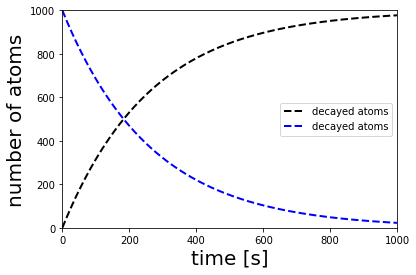

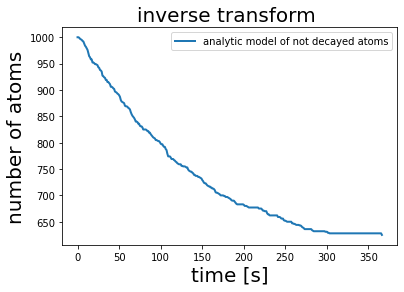

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

tau=3.052*60
N=1000

def dec(x):
    return (1-2**(-x/tau))

x=np.linspace(0, 1000, 1000)

plt.plot(x, N*dec(x), linewidth=2,color='k', label='decayed atoms', linestyle = '--')
plt.plot(x, N*(1-dec(x)), linewidth=2, color='b',label='decayed atoms',  linestyle = '--')
plt.xlabel('time [s]', size=20)
plt.ylabel('number of atoms',size=20)
plt.axis([0, 1000, 0, 1000])
plt.legend()
plt.show()

# monte carlo method


# Definition of the inverse cumulative distribution function.
def icdf(z,tau):
    t = np.zeros(len(z))
    for i in range(len(z)):
        t[i] = -tau*math.log((1-z[i]),2)
    return t

u = np.random.random(1000)
v = np.sort(icdf(u, tau)) # apply the inverse of the CDF

time = np.linspace(0,1000,1000)  # time 
counts = np.zeros(1000)              
index = 0

for j in range(1000):
    if v[j] < time[index]:
        counts[index] += 1
    else:
        index += 1

total = np.sum(counts)
q = 0
decayed_T = []
while(np.sum(counts[:q])<total):
    decayed_T.append(np.sum(counts[:q]))
    q += 1

decayed = np.asarray(decayed_T) 
not_decayed = (1000-decayed)           

plt.plot(time[:q],not_decayed, linewidth=2, label='analytic model of not decayed atoms')
plt.xlabel('time [s]', size=20)
plt.ylabel('number of atoms',size=20)
plt.title('inverse transform ',size=20)
plt.legend()
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

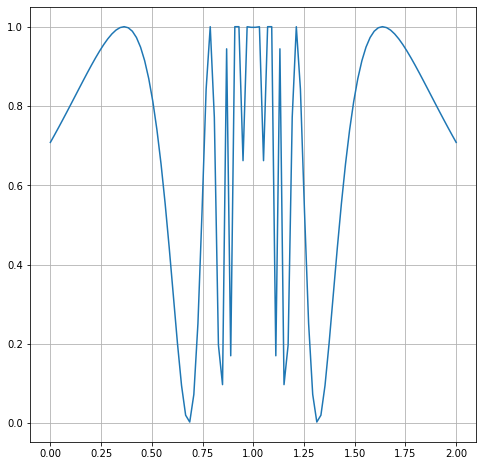


Hit/miss method

Integral: 1.34812 with error: 0.002964477130287903

Mean value method:

Integral: 1.3491309189508014 with  error: 0.0020650764714537375


In [5]:
def f(x):
    return pow(np.sin(1/(1-x)),2)
a=0
b=2
x = np.linspace(b, a, 100)
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x,f(x))
ax.grid()
plt.show()


print("\nHit/miss method")
N = 100000
count = 0
for i in range(N):
    x = 2 * np.random.random() 
    y = np.random.random()   
    if y < f(x): count += 1
I = 2 * count / N

p=count/N   
err = (b-a)*np.sqrt(N*p*(1-p))/N
print("\nIntegral:", I,"with error:",err)

print("\nMean value method:")
x_random = np.array([(np.random.uniform(0, 2)) for i in range(N)])
sum_f=sum(f(x_random)) # sum of f(x)
I_mean = ((b-a)*sum_f)/N

f1=(sum(f(x_random)**2))/(N)
f2=(sum_f)/(N)

err_mean=(b-a)*np.sqrt((f1-f2**2)/N)
print("\nIntegral:",I_mean,"with  error:",err_mean)



ratio_err = err_mean/err 


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [11]:
#function definiton
def f(x,y):
    return x**2+y**2
N=100000
#function for integral
def integral(): 
    count=0
    for i in range(N):
        x = np.random.uniform(-1,1)
        y = np.random.uniform(-1,1)
        if f(x,y)<=1: 
            count+=1
    I = 4*count/N
    return I
print("the area of a circle of unit radius is")
print(integral())
d=10
#Generalize the result for a 10D sphere.
def integingal_10d():
    c2=0
    for i in range(N):
        s1=0
        for j in range (d):
            s1+=((np.random.random())**2)
            #print(s1)
        if (s1<=1):
            c2+=1;
    return (2**10)*(c2/N)
print('the volume of a', d ,' dimensions sphere of unit radius is:',integingal_10d())

K=30
tmp1=[integingal_10d for i in range (K)]
tmp2=[integral() for i in range (K)]
print('\nthe average area of a 2d sphere is',np.mean(tmp2))
print('the average volume of a 10d sphere is',np.mean(tmp1))
# the result in quite instable, so I evaluated the average

the area of a circle of unit radius is
3.1372
the volume of a 10  dimensions sphere of unit radius is: 2.58048

the average area of a 2d sphere is 3.1419799999999998


TypeError: ignored

4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [14]:
# deffinition function
def formula(x):
    return (x**(-0.5))/(np.exp(x)+1)
def w(x):
    return 1/(np.sqrt(x))

a=0
b=1
N=1000
first=True
for i in range(N):
    r = np.random.uniform(a, b)**2 
    if first:
        func = np.array([formula(r)])
        wunc = np.array([w(r)])
        first = False
    else:
        func = np.append(func, formula(r))
        wunc = np.append(wunc, w(r))
        
I = 2*sum(func/wunc)/N

print('result: ',I)

result:  0.8411432432309365
